## Q1:Supervised, Semi-Supervised, and Unsupervised Learning

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random
from sklearn.cluster import SpectralClustering
from sklearn import manifold
import heapq
from heapq import heappush, heappop,nsmallest

## (a) Choose training and test set

In [2]:
df = pd.read_csv('wdbc.csv')

In [3]:
data_pos = df[df['Diagnosis'].isin(['M'])]
data_neg = df[df['Diagnosis'].isin(['B'])]
testpos, trainpos = train_test_split(data_pos, test_size=0.80, shuffle=False)
testneg, trainneg = train_test_split(data_neg, test_size=0.80, shuffle=False)
train = pd.concat([trainneg,trainpos])
test = pd.concat([testneg,testpos])
train.index = range(len(train))
test.index = range(len(test))

In [4]:
x_cols = [x for x in df.columns if x != 'Diagnosis']
df1 = df[x_cols]
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df1)
df_normalized = pd.DataFrame(np_scaled)
df_normalized.columns = x_cols
df_normalized['Diagnosis'] = df.iloc[:,1]
df_normalized['Diagnosis'] = df_normalized['Diagnosis'].replace('B',0,regex=True)
df_normalized['Diagnosis'] = df_normalized['Diagnosis'].replace('M',1,regex=True)

## (b)Monte-Carlo Simulation

### Compare the average scores (accuracy, precision, recall, F-score, and AUC)  that I obtain from the Supervised Learning, Semi-Supervised Learning and Unsupervised Learning we could draw the conclusion that the Supervised Learning has the best result among the 3 methods. The average accuracy, precision, recall and F-score are the best in the test data. As for the Semi-Supervised Learning and Unsupervised Learning, the Semi has a better performance on the test data. As for the Unsupervised Learning the k-means no matter for the test data or the train data has a better performance than the spectral clustering.
### i:Supervised Learning: Train an L1-penalized SVM 

In [127]:

X = df_normalized[x_cols]
y = df_normalized['Diagnosis']
df_normalized['Diagnosis'] = df_normalized['Diagnosis'].replace('B',0,regex=True)
df_normalized['Diagnosis'] = df_normalized['Diagnosis'].replace('M',1,regex=True)
data_posn = df_normalized[df_normalized['Diagnosis'].isin([0])]
data_negn = df_normalized[df_normalized['Diagnosis'].isin([1])]
testposn, trainposn = train_test_split(data_posn, test_size=0.80, shuffle=False,random_state=0)
testnegn, trainnegn = train_test_split(data_negn, test_size=0.80, shuffle=False,random_state=0)
trainn = pd.concat([trainnegn,trainposn])
testn = pd.concat([testnegn,testposn])
trainn.index = range(len(trainn))
testn.index = range(len(testn))

In [132]:
x_train=trainn.iloc[:,0:31]
y_train=trainn.iloc[:,31]
x_test=testn.iloc[:,0:31]
y_test=testn.iloc[:,31]
Diag = train['Diagnosis']
train.drop(labels=['Diagnosis'], axis=1,inplace = True)
train.insert(31, 'Diagnosis', Diag)

In [133]:
svm1 = LinearSVC(loss='squared_hinge',penalty='l1',dual=False)
params_dict1 = {"C": np.logspace(-1, 2, 10)}
gs1 = GridSearchCV(estimator=svm1, param_grid=params_dict1,cv=5,scoring='accuracy')
gs1.fit(x_train, y_train)
y_pred = gs1.predict(x_test)
y_train_pred=gs1.predict(x_train)

Train data:
The confusion matrix in the test set:***********

Train Predicted classes    0    1
Train Actual classes             
0                        286    0
1                          5  165


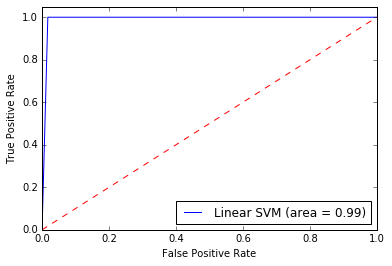

In [159]:
print("Train data:")
print("The confusion matrix in the test set:***********\n")
print(pd.crosstab(y_train, y_train_pred, rownames=['Train Actual classes'], colnames=['Train Predicted classes']))
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_train_pred,y_train)
fpr, tpr, thresholds = roc_curve(y_train_pred,y_train)
plt.figure()
plt.plot(fpr, tpr, label='Linear SVM (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Test data:
The confusion matrix in the test set:***********

Test Predicted classes   0   1
Test Actual classes           
0                       68   3
1                        3  39


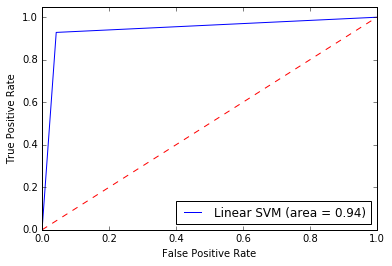

In [161]:
print("Test data:")
print("The confusion matrix in the test set:***********\n")
print(pd.crosstab(y_test, y_pred, rownames=['Test Actual classes'], colnames=['Test Predicted classes']))
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_pred,y_test)
fpr, tpr, thresholds = roc_curve(y_pred,y_test)
plt.figure()
plt.plot(fpr, tpr, label='Linear SVM (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [140]:
train_Acc=[]
test_Acc=[]
train_Precision=[]
test_Precision=[]
train_Recall=[]
test_Recall=[]
train_f1=[]
test_f1=[]
train_AUC=[]
test_AUC=[]

for i in range(1,31,1):
    data_posn = df_normalized[df_normalized['Diagnosis'].isin([0])]
    data_negn = df_normalized[df_normalized['Diagnosis'].isin([1])]
    testposn, trainposn = train_test_split(data_posn, test_size=0.80, shuffle=False,random_state=i)
    testnegn, trainnegn = train_test_split(data_negn, test_size=0.80, shuffle=False,random_state=i)
    trainn = pd.concat([trainnegn,trainposn])
    testn = pd.concat([testnegn,testposn])
    trainn.index = range(len(trainn))
    testn.index = range(len(testn))
    x_train=trainn.iloc[:,0:31]
    y_train=trainn.iloc[:,31]
    x_test=testn.iloc[:,0:31]
    y_test=testn.iloc[:,31]
    svm1 = LinearSVC(loss='squared_hinge',penalty='l1',dual=False)
    params_dict1 = {"C": np.logspace(-1, 2, 10)}
    gs1 = GridSearchCV(estimator=svm1, param_grid=params_dict1,cv=5,scoring='accuracy')
    gs1.fit(x_train, y_train)
    y_pred = gs1.predict(x_test)
    y_train_pred=gs1.predict(x_train)
    train_Acc.append(accuracy_score(y_train_pred,y_train))
    test_Acc.append(accuracy_score(y_pred,y_test))
    train_Precision.append(precision_score(y_train_pred,y_train))
    test_Precision.append(precision_score(y_pred,y_test))
    train_Recall.append(recall_score(y_train_pred,y_train))
    test_Recall.append(recall_score(y_pred,y_test))
    train_f1.append(f1_score(y_train_pred,y_train))
    test_f1.append(f1_score(y_pred,y_test))
    train_AUC.append(roc_auc_score(y_train_pred,y_train))
    test_AUC.append(roc_auc_score(y_pred,y_test))

In [144]:
print("Train set")
print("Average Accuracy:",np.mean(train_Acc))
print("Average Precision:",np.mean(train_Precision))
print("Average Recall:",np.mean(train_Recall))
print("Average f1:",np.mean(train_f1))
print("Average AUC:",np.mean(train_AUC))
print("**********")
print("Test Data")
print("Average Accuracy:",np.mean(test_Acc))
print("Average Precision:",np.mean(test_Precision))
print("Average Recall:",np.mean(test_Recall))
print("Average f1:",np.mean(test_f1))
print("Average AUC:",np.mean(test_AUC))

Train set
Average Accuracy: 0.9863157894736843
Average Precision: 0.9683529411764705
Average Recall: 0.9948079970928763
Average f1: 0.9813874343449885
Average AUC: 0.9881534371909251
**********
Test Data
Average Accuracy: 0.9589380530973451
Average Precision: 0.9433333333333335
Average Recall: 0.9464046526360764
Average f1: 0.944755477052947
Average AUC: 0.9564806206289369


### ii:Semi-Supervised Learning/ Self-training:

In [271]:
train_pos = trainn[trainn['Diagnosis'].isin([1])]
train_neg = trainn[trainn['Diagnosis'].isin([0])]
train_label_pos, train_unlabel_pos = train_test_split(train_pos, test_size=0.50, shuffle=False,random_state=0)
train_label_neg, train_unlabel_neg = train_test_split(train_neg, test_size=0.50, shuffle=False,random_state=0)
train_label = pd.concat([train_label_pos,train_label_neg])
train_unlabel = pd.concat([train_unlabel_pos,train_unlabel_neg])
train_label.index = range(len(train_label))
train_unlabel.index = range(len(train_unlabel))
x_train_label=train_label.iloc[:,0:31]
y_train_label=train_label.iloc[:,31]
x_train_unlabel = train_unlabel.iloc[:,0:31]
y_train_unlabel=train_unlabel.iloc[:,31]

In [283]:
svm1 = LinearSVC(loss='squared_hinge',penalty='l1',dual=False)
params_dict1 = {"C": np.logspace(-1, 2, 10)}
gs2 = GridSearchCV(estimator=svm1, param_grid=params_dict1,cv=5,scoring='accuracy')
gs2.fit(x_train_label,y_train_label)
best_C = gs2.best_params_['C']
x_newtrain_label = x_train_label
y_newtrain_label = y_train_label
x_newtrain_unlabel = x_train_unlabel
y_newtrain_unlabel = y_train_unlabel
for i in range(len(x_train_unlabel)):
    dist=[]
    svm_lin = LinearSVC(loss='squared_hinge',penalty='l1',dual=False,C=best_C)
    svm_lin.fit(x_newtrain_label,y_newtrain_label)
    y_new_pred = svm_lin.predict(x_newtrain_unlabel)
    #Calculate the longest distance
    y = svm_lin.decision_function(x_newtrain_unlabel)
    w_norm = np.linalg.norm(svm_lin.coef_)
    dist = y / w_norm
    dist = dist.tolist()
    max_dis = dist.index(max(dist))
    #add newtrain
    x_newtrain_label = x_newtrain_label.append(x_train_unlabel.iloc[max_dis,:])
    y_newtrain_label = np.append(y_newtrain_label,y_new_pred[max_dis])
    #drop unlabel
    x_newtrain_unlabel.drop(x_newtrain_unlabel.index[[max_dis]],inplace=True)
y_pred1 = svm_lin.predict(x_test)
y_train_pred1=svm_lin.predict(x_train)

Train data:
The confusion matrix in the test set:***********

Train Predicted classes    0    1
Train Actual classes             
0                        278    8
1                          5  165


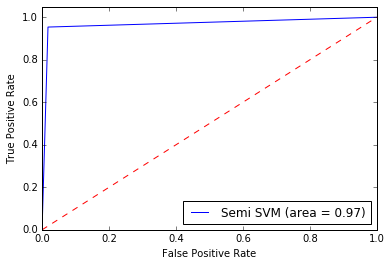

In [284]:
print("Train data:")
print("The confusion matrix in the test set:***********\n")
print(pd.crosstab(y_train, y_train_pred1, rownames=['Train Actual classes'], colnames=['Train Predicted classes']))
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_train_pred1,y_train)
fpr, tpr, thresholds = roc_curve(y_train_pred1,y_train)
plt.figure()
plt.plot(fpr, tpr, label='Semi SVM (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Test data:
The confusion matrix in the test set:***********

Test Predicted classes   0   1
Test Actual classes           
0                       68   3
1                        2  40


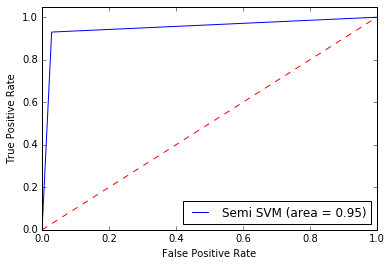

In [285]:
print("Test data:")
print("The confusion matrix in the test set:***********\n")
print(pd.crosstab(y_test, y_pred1, rownames=['Test Actual classes'], colnames=['Test Predicted classes']))
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_pred1,y_test)
fpr, tpr, thresholds = roc_curve(y_pred1,y_test)
plt.figure()
plt.plot(fpr, tpr, label='Semi SVM (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [357]:
train_Acc1=[]
test_Acc1=[]
train_Precision1=[]
test_Precision1=[]
train_Recall1=[]
test_Recall1=[]
train_f11=[]
test_f11=[]
train_AUC1=[]
test_AUC1=[]

for j in range(1,31,1):
    train_label_pos, train_unlabel_pos = train_test_split(train_pos, test_size=0.50, shuffle=False,random_state=j)
    train_label_neg, train_unlabel_neg = train_test_split(train_neg, test_size=0.50, shuffle=False,random_state=j)
    train_label = pd.concat([train_label_pos,train_label_neg])
    train_unlabel = pd.concat([train_unlabel_pos,train_unlabel_neg])
    train_label.index = range(len(train_label))
    train_unlabel.index = range(len(train_unlabel))
    x_train_label=train_label.iloc[:,0:31]
    y_train_label=train_label.iloc[:,31]
    x_train_unlabel = train_unlabel.iloc[:,0:31]
    y_train_unlabel=train_unlabel.iloc[:,31]
    for i in range(len(x_train_unlabel)):
        svm2 = LinearSVC(loss='squared_hinge',penalty='l1',dual=False)
        params_dict1 = {"C": np.logspace(-1, 2, 10)}
        gs3 = GridSearchCV(estimator=svm1, param_grid=params_dict1,cv=5,scoring='accuracy')
        gs3.fit(x_train_label,y_train_label)
        best_C = gs3.best_params_['C']
        x_newtrain_label = x_train_label
        y_newtrain_label = y_train_label
        x_newtrain_unlabel = x_train_unlabel
        y_newtrain_unlabel = y_train_unlabel
        dist=[]
        svm_lin = LinearSVC(loss='squared_hinge',penalty='l1',dual=False,C=best_C)
        svm_lin.fit(x_newtrain_label,y_newtrain_label)
        y_new_pred = svm_lin.predict(x_newtrain_unlabel)
        #Calculate the distance
        y = svm_lin.decision_function(x_newtrain_unlabel)
        w_norm = np.linalg.norm(svm_lin.coef_)
        dist = y / w_norm
        dist = dist.tolist()
        max_dis = dist.index(max(dist))
        #add newtrain
        x_newtrain_label = x_newtrain_label.append(x_train_unlabel.iloc[max_dis,:])
        y_newtrain_label = np.append(y_newtrain_label,y_new_pred[max_dis])
        #drop unlabel
        x_newtrain_unlabel.drop(x_newtrain_unlabel.index[[max_dis]],inplace=True)
    y_pred2 = svm_lin.predict(x_test)
    y_train_pred2 = svm_lin.predict(x_train)
    train_Acc1.append(accuracy_score(y_train_pred2,y_train))
    test_Acc1.append(accuracy_score(y_pred2,y_test))
    train_Precision1.append(precision_score(y_train_pred2,y_train))
    test_Precision1.append(precision_score(y_pred2,y_test))
    train_Recall1.append(recall_score(y_train_pred2,y_train))
    test_Recall1.append(recall_score(y_pred2,y_test))
    train_f11.append(f1_score(y_train_pred2,y_train))
    test_f11.append(f1_score(y_pred2,y_test))
    train_AUC1.append(roc_auc_score(y_train_pred2,y_train))
    test_AUC1.append(roc_auc_score(y_pred2,y_test))

In [358]:
print("Train set")
print("Average Accuracy:",np.mean(train_Acc1))
print("Average Precision:",np.mean(train_Precision1))
print("Average Recall:",np.mean(train_Recall1))
print("Average f1:",np.mean(train_f11))
print("Average AUC:",np.mean(train_AUC1))
print("**********")
print("Test Data")
print("Average Accuracy:",np.mean(test_Acc1))
print("Average Precision:",np.mean(test_Precision1))
print("Average Recall:",np.mean(test_Recall1))
print("Average f1:",np.mean(test_f11))
print("Average AUC:",np.mean(test_AUC1))

Train set
Average Accuracy: 0.9714912280701752
Average Precision: 0.9529411764705882
Average Recall: 0.970059880239521
Average f1: 0.961424332344214
Average AUC: 0.9711891096699332
**********
Test Data
Average Accuracy: 0.9383480825958702
Average Precision: 0.9293650793650791
Average Recall: 0.9070472163495419
Average f1: 0.9180665754673962
Average AUC: 0.9323262306730453


### iii:Unsupervised Learning：Run k-means algorithm

### I initialize the alforithm randomly mutiple times with the parameter 'n_init' and 'random_state' to make sure the algorithem was not trapped in a local minimum

In [195]:
train['Diagnosis'] = train['Diagnosis'].replace('B',0,regex=True)
train['Diagnosis'] = train['Diagnosis'].replace('M',1,regex=True)
test['Diagnosis'] = test['Diagnosis'].replace('B',0,regex=True)
test['Diagnosis'] = test['Diagnosis'].replace('M',1,regex=True)
x_train_un = train[x_cols]
y_train_un = train['Diagnosis']
x_test_un = test[x_cols]
y_test_un = test['Diagnosis']
x_train_un1 = x_train_un.iloc[:,1:]
y_train_un1 = y_train_un
x_test_un1 = x_test_un.iloc[:,1:]
y_test_un1 = y_test_un

In [434]:
kmeans = KMeans(n_clusters=2,n_init=100,random_state=100).fit(x_train_un1)
center = kmeans.cluster_centers_
#find the 30 nearest distance to center0 in x_train_un
d0 = kmeans.transform(x_train_un1)[:, 0]
ind0 = np.argsort(d0)[::][:30].tolist()
l0 = y_train_un1.iloc[ind0].tolist()
pol0 = max(set(l0), key = l0.count)
#find the 30 nearest distance to center1 in x_train_un
d1 = kmeans.transform(x_train_un1)[:, 1]
ind1 = np.argsort(d1)[::][:30].tolist()
l1 = y_train_un1.iloc[ind1].tolist()
pol1 = max(set(l1), key = l1.count)
pre_train = kmeans.predict(x_train_un1)
for n in range(len(pre_train)):
    if(pre_train[n] == 0):
        pre_train[n] = pol0
    elif(pre_train[n] == 1):
        pre_train[n] = pol1

pre_test = kmeans.predict(x_test_un1)
for n in range(len(pre_test)):
    if(pre_test[n] == 0):
        pre_test[n] = pol0
    elif(pre_test[n] == 1):
        pre_test[n] = pol1

Train data:
The confusion matrix in the test set:***********

Train Predicted classes    0    1
Train Actual classes             
0                        285    1
1                         68  102


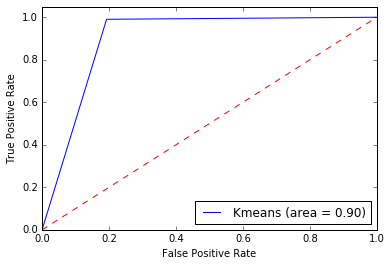

In [441]:
print("Train data:")
print("The confusion matrix in the test set:***********\n")
print(pd.crosstab(y_train_un1, pre_train, rownames=['Train Actual classes'], colnames=['Train Predicted classes']))
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(pre_train,y_train_un1)
fpr, tpr, thresholds = roc_curve(pre_train,y_train_un1)
plt.figure()
plt.plot(fpr, tpr, label='Kmeans (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Test data:
The confusion matrix in the test set:***********

Test Predicted classes   0   1
Test Actual classes           
0                       71   0
1                       22  20


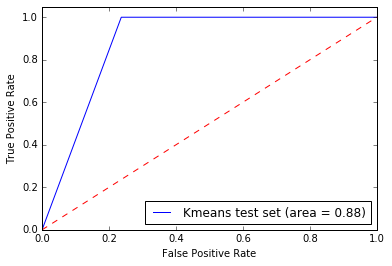

In [442]:
print("Test data:")
print("The confusion matrix in the test set:***********\n")
print(pd.crosstab(y_test_un1, pre_test, rownames=['Test Actual classes'], colnames=['Test Predicted classes']))
logit_roc_auc = roc_auc_score(pre_test,y_test_un1)
fpr, tpr, thresholds = roc_curve(pre_test,y_test_un1)
plt.figure()
plt.plot(fpr, tpr, label='Kmeans test set (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [158]:
train_Acc2=[]
test_Acc2=[]
train_Precision2=[]
test_Precision2=[]
train_Recall2=[]
test_Recall2=[]
train_f12=[]
test_f12=[]
train_AUC2=[]
test_AUC2=[]

for i in range(1,31,1):
    y_train_pred3=[]
    y_pred3=[]
    data_pos = df[df['Diagnosis'].isin(['M'])]
    data_neg = df[df['Diagnosis'].isin(['B'])]
    testpos, trainpos = train_test_split(data_pos, test_size=0.80, random_state=i)
    testneg, trainneg = train_test_split(data_neg, test_size=0.80, random_state=i)
    train = pd.concat([trainneg,trainpos])
    test = pd.concat([testneg,testpos])
    train.index = range(len(train))
    test.index = range(len(test))
    train['Diagnosis'] = train['Diagnosis'].replace('B',0,regex=True)
    train['Diagnosis'] = train['Diagnosis'].replace('M',1,regex=True)
    test['Diagnosis'] = test['Diagnosis'].replace('B',0,regex=True)
    test['Diagnosis'] = test['Diagnosis'].replace('M',1,regex=True)
    x_train_un = train[x_cols]
    y_train_un = train['Diagnosis']
    x_test_un = test[x_cols]
    y_test_un = test['Diagnosis']
    x_train_un1 = x_train_un.iloc[:,1:]
    y_train_un1 = y_train_un
    x_test_un1 = x_test_un.iloc[:,1:]
    y_test_un1 = y_test_un
    kmeans = KMeans(n_clusters=2,init='random',random_state=i).fit(x_train_un1)
    d0 = kmeans.transform(x_train_un1)[:, 0]
    ind0 = np.argsort(d0)[::][:30].tolist()
    l0 = y_train_un1.iloc[ind0].tolist()
    pol0 = max(set(l0), key = l0.count)
    #find the 30 nearest distance to center1 in x_train_un
    d1 = kmeans.transform(x_train_un1)[:, 1]
    ind1 = np.argsort(d1)[::][:30].tolist()
    l1 = y_train_un1.iloc[ind1].tolist()
    pol1 = max(set(l1), key = l1.count)
    y_train_pred3 = kmeans.predict(x_train_un1)
    for n in range(len(y_train_pred3)):
        if(y_train_pred3[n] == 0):
            y_train_pred3[n] = pol0
        elif(y_train_pred3[n] == 1):
            y_train_pred3[n] = pol1
    y_pred3 = kmeans.predict(x_test_un1)
    for n in range(len(y_pred3)):
        if(y_pred3[n] == 0):
            y_pred3[n] = pol0
        elif(y_pred3[n] == 1):
            y_pred3[n] = pol1
    train_Acc2.append(accuracy_score(y_train_pred3,y_train_un1))
    test_Acc2.append(accuracy_score(y_pred3,y_test_un1))
    train_Precision2.append(precision_score(y_train_pred3,y_train_un1))
    test_Precision2.append(precision_score(y_pred3,y_test_un1))
    train_Recall2.append(recall_score(y_train_pred3,y_train_un1))
    test_Recall2.append(recall_score(y_pred3,y_test_un1))
    train_f12.append(f1_score(y_train_pred3,y_train_un1))
    test_f12.append(f1_score(y_pred3,y_test_un1))
    train_AUC2.append(roc_auc_score(y_train_pred3,y_train_un1))
    test_AUC2.append(roc_auc_score(y_pred3,y_test_un1))    

In [159]:
print("Train set")
print("Average Accuracy:",np.mean(train_Acc2))
print("Average Precision:",np.mean(train_Precision2))
print("Average Recall:",np.mean(train_Recall2))
print("Average f1:",np.mean(train_f12))
print("Average AUC:",np.mean(train_AUC2))
print("**********")
print("Test Data")
print("Average Accuracy:",np.mean(test_Acc2))
print("Average Precision:",np.mean(test_Precision2))
print("Average Recall:",np.mean(test_Recall2))
print("Average f1:",np.mean(test_f12))
print("Average AUC:",np.mean(test_AUC2))

Train set
Average Accuracy: 0.8504385964912279
Average Precision: 0.6039215686274509
Average Recall: 0.9916495537687565
Average f1: 0.7504043130021116
Average AUC: 0.9003596477519407
**********
Test Data
Average Accuracy: 0.8557522123893805
Average Precision: 0.6150793650793651
Average Recall: 0.9946221532091097
Average f1: 0.7574339930745542
Average AUC: 0.9050150482935286


### iv:Spectral Clustering
### What spectral clustering is: Spectral clustering is a techniques that make use of the spectrum (eigenvalues) of the similarity matrix of the data to perform dimensionality reduction before clustering in fewer dimensions. The similarity matrix is provided as an input and consists of a quantitative assessment of the relative similarity of each pair of points in the dataset.

In [7]:
data_pos['Diagnosis'] = data_pos['Diagnosis'].replace('M',1,regex=True)
data_neg['Diagnosis'] = data_neg['Diagnosis'].replace('B',0,regex=True)
data_pos1 = data_pos.iloc[:,2:]
data_pos1['Diagnosis'] = data_pos['Diagnosis']
data_neg1 = data_neg.iloc[:,2:]
data_neg1['Diagnosis'] = data_neg['Diagnosis']
X_train_M4, X_test_M4, y_train_M4, y_test_M4 = train_test_split(data_pos1.iloc[:,:-1],data_pos1.iloc[:,-1], test_size=0.2, random_state=10, shuffle=True)
X_train_B4, X_test_B4, y_train_B4, y_test_B4 = train_test_split(data_neg1.iloc[:,:-1],data_neg1.iloc[:,-1], test_size=0.2, random_state=10, shuffle=True)
X_train4 = pd.concat([X_train_M4,X_train_B4])
y_train4 = pd.concat([y_train_M4,y_train_B4])
X_test4 = pd.concat([X_test_M4,X_test_B4])
y_test4 = pd.concat([y_test_M4,y_test_B4])
 
x_train_sc = manifold.SpectralEmbedding(n_components=2).fit_transform(X_train4)
x_test_sc = manifold.SpectralEmbedding(n_components=2).fit_transform(X_test4)
kmeans1 = KMeans(n_clusters=2,init='random',n_init=20).fit(x_train_sc)
d0_sc = kmeans1.transform(x_train_sc)[:, 0]
ind0_sc = np.argsort(d0_sc)[::][:30].tolist()
l0_sc = y_train4.iloc[ind0_sc].tolist()
pol0_sc = max(set(l0_sc), key = l0_sc.count)
#find the 30 nearest distance to center1 in x_train_sc
d1_sc = kmeans1.transform(x_train_sc)[:, 1]
ind1_sc = np.argsort(d1_sc)[::][:30].tolist()
l1_sc = y_train4.iloc[ind1_sc].tolist()
pol1_sc = max(set(l1_sc), key = l1_sc.count)
y_train_pred1 = kmeans1.predict(x_train_sc)
for n in range(len(y_train_pred1)):
    if(y_train_pred1[n] == 0):
        y_train_pred1[n] = pol0_sc
    elif(y_train_pred1[n] == 1):
        y_train_pred1[n] = pol1_sc

pre_test1 = kmeans1.predict(x_test_sc)
for n in range(len(pre_test1)):
    if(pre_test1[n] == 0):
        pre_test1[n] = pol0_sc
    elif(pre_test1[n] == 1):
        pre_test1[n] = pol1_sc

Train data:
The confusion matrix in the test set:***********

Train Predicted classes    0    1
Train Actual classes             
0                        282   48
1                          3  121


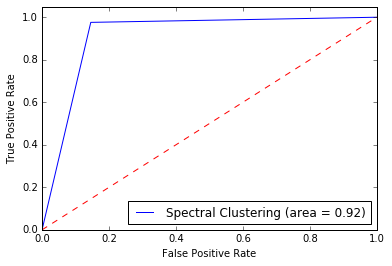

In [225]:
print("Train data:")
print("The confusion matrix in the test set:***********\n")
print(pd.crosstab(y_train_pred1,y_train4, rownames=['Train Actual classes'], colnames=['Train Predicted classes']))
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_train_pred1,y_train4)
fpr, tpr, thresholds = roc_curve(y_train_pred1,y_train4)
plt.figure()
plt.plot(fpr, tpr, label='Spectral Clustering (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Train data:
The confusion matrix in the test set:***********

Train Predicted classes    0    1
Train Actual classes             
0                        282   53
1                          3  116


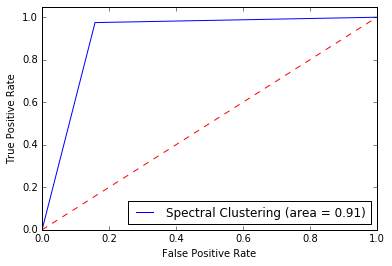

In [8]:
print("Train data:")
print("The confusion matrix in the test set:***********\n")
print(pd.crosstab(y_train_pred1,y_train4, rownames=['Train Actual classes'], colnames=['Train Predicted classes']))
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_train_pred1,y_train4)
fpr, tpr, thresholds = roc_curve(y_train_pred1,y_train4)
plt.figure()
plt.plot(fpr, tpr, label='Spectral Clustering (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Test data:
The confusion matrix in the test set:***********

Test Predicted classes   0   1
Test Actual classes           
0                       71   6
1                        1  37


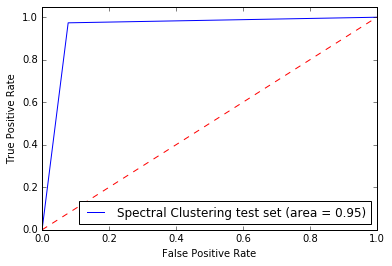

In [233]:
print("Test data:")
print("The confusion matrix in the test set:***********\n")
print(pd.crosstab(pre_test1,y_test4, rownames=['Test Actual classes'], colnames=['Test Predicted classes']))
logit_roc_auc = roc_auc_score(pre_test1,y_test4)
fpr, tpr, thresholds = roc_curve(pre_test1,y_test4)
plt.figure()
plt.plot(fpr, tpr, label='Spectral Clustering test set (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [38]:
train_acc8=[]
test_acc8=[]
train_precision8=[]
test_precision8=[]
train_recall8=[]
test_recall8=[]
train_fscore8=[]
test_fscore8=[]
train_auc8=[]
test_auc8=[]

for i in range(0,10,1):
    X_train_M4, X_test_M4, y_train_M4, y_test_M4 = train_test_split(data_pos1.iloc[:,:-1],data_pos1.iloc[:,-1], test_size=0.2, random_state=i, shuffle=True)
    X_train_B4, X_test_B4, y_train_B4, y_test_B4 = train_test_split(data_neg1.iloc[:,:-1],data_neg1.iloc[:,-1], test_size=0.2, random_state=i, shuffle=True)
    X_train4 = pd.concat([X_train_M4,X_train_B4])
    y_train4 = pd.concat([y_train_M4,y_train_B4])
    X_test4 = pd.concat([X_test_M4,X_test_B4])
    y_test4 = pd.concat([y_test_M4,y_test_B4])
    dis_train = manifold.SpectralEmbedding(n_components=2).fit_transform(X_train4)
    dis_test = manifold.SpectralEmbedding(n_components=2).fit_transform(X_test4)
    k_model = KMeans(n_clusters=2,init='random',random_state=i,n_init = 20).fit(dis_train)
    d0 = k_model.transform(dis_train)[:, 1]
    dis_30_1 = np.argsort(d0)[::][:30].tolist()
    l0= y_train4.iloc[dis_30_1].tolist()
    pol0_sc = max(set(l0), key = l0.count)
    #find the 30 nearest distance to center1 in x_train_un
    d1 = k_model.transform(dis_train)[:, 0]
    dis_30_2 = np.argsort(d1)[::][:30].tolist()
    l1 = y_train4.iloc[dis_30_2].tolist()
    pol1_sc = max(set(l1), key = l1.count)
    pre_train4 = k_model.predict(dis_train)
    for n in range(len(pre_train4)):
        if(pre_train4[n] == 0):
            pre_train4[n] = pol0_sc
        elif(pre_train4[n] == 1):
            pre_train4[n] = pol1_sc
    pre_test4 = k_model.predict(dis_test)
    for n in range(len(pre_test4)):
        if(pre_test4[n] == 0):
            pre_test4[n] = pol0_sc
        elif(pre_test4[n] == 1):
            pre_test4[n] = pol1_sc
    train_acc8.append(accuracy_score(y_train4,pre_train4))
    test_acc8.append(accuracy_score(y_test4,pre_test4))
    train_precision8.append(precision_score(y_train4,pre_train4))
    test_precision8.append(precision_score(y_test4,pre_test4))
    train_recall8.append(recall_score(y_train4,pre_train4))
    test_recall8.append(recall_score(y_test4,pre_test4))
    train_fscore8.append(f1_score(y_train4,pre_train4))
    test_fscore8.append(f1_score(y_test4,pre_test4))
    train_auc8.append(roc_auc_score(y_train4,pre_train4))
    test_auc8.append(roc_auc_score(y_test4,pre_test4))

In [40]:
print("Train set")
print("Average Accuracy:",np.mean(train_acc8))
print("Average Precision:",np.mean(train_precision8))
print("Average Recall:",np.mean(train_recall8))
print("Average f1:",np.mean(train_fscore8))
print("Average AUC:",np.mean(train_auc8))
print("**********")
print("Test Data")
print("Average Accuracy:",np.mean(test_acc8))
print("Average Precision:",np.mean(test_precision8))
print("Average Recall:",np.mean(test_recall8))
print("Average f1:",np.mean(test_fscore8))
print("Average AUC:",np.mean(test_auc8))

Train set
Average Accuracy: 0.8812775330396476
Average Precision: 0.9792027247068157
Average Recall: 0.6958579881656805
Average f1: 0.8134437093620159
Average AUC: 0.8435430291705595
**********
Test Data
Average Accuracy: 0.5365217391304348
Average Precision: 0.4602679569699887
Average Recall: 0.7209302325581395
Average f1: 0.5527094388762712
Average AUC: 0.5736595607235142


# Homework 2 Active Learning Using Support Vector Machines

## (a)Random select test and train data 

In [21]:
df_ac = pd.read_csv('data2.csv')

In [22]:
a = random.sample([i for i in range(1372)],472)
test_ac = pd.DataFrame(columns = df_ac.columns)
train_ac = pd.DataFrame(columns = df_ac.columns)
for i in range(len(df_ac)):
    if i in a:
        test_ac=test_ac.append(df_ac.iloc[i,:])
    else:
        train_ac=train_ac.append(df_ac.iloc[i,:])

In [23]:
x_train_ac = train_ac.iloc[:,:4]
y_train_ac = train_ac.iloc[:,4]
x_test_ac = test_ac.iloc[:,:4]
y_test_ac = test_ac.iloc[:,4]

## (b) Repeat each of the following two procedures 50 times

### i:Train a SVM with a pool of 10 randomly selected data points

#### Choose the range for parameter C:According to the accuracy we decide to choose c between 0.01 and 100

In [50]:
temp_model = LinearSVC(penalty='l1',loss='squared_hinge', dual=False,C=0.0001)
temp_model.fit(x_train_ac, y_train_ac)
pre = temp_model.predict(x_train_ac)
print("accuracy with C=0.0001: ",accuracy_score(y_train_ac, pre))

temp_model2 = LinearSVC(penalty='l1',loss='squared_hinge', dual=False,C=0.001)
temp_model2.fit(x_train_ac, y_train_ac)
pre2 = temp_model2.predict(x_train_ac)
print("accuracy with C=0.001: ",accuracy_score(y_train_ac, pre2))

temp_model3 = LinearSVC(penalty='l1',loss='squared_hinge', dual=False,C=0.1)
temp_model3.fit(x_train_ac, y_train_ac)
pre3 = temp_model3.predict(x_train_ac)
print("accuracy with C=0.1: ",accuracy_score(y_train_ac, pre3))

temp_model4 = LinearSVC(penalty='l1',loss='squared_hinge', dual=False,C=1)
temp_model4.fit(x_train_ac, y_train_ac)
pre4 = temp_model4.predict(x_train_ac)
print("accuracy with C=100: ",accuracy_score(y_train_ac, pre4))

accuracy with C=0.0001:  0.5488888888888889
accuracy with C=0.001:  0.8888888888888888
accuracy with C=0.1:  0.9866666666666667
accuracy with C=100:  0.9922222222222222


In [34]:
svms_all1 = [[] for i in range(50)]
test_error1 = [[] for i in range(50)]
for j in range(0,50,1):   
    ori_train_ac = train_ac
    new_train_ac = pd.DataFrame(columns = df_ac.columns)
    for i in range(0,900,10):
        if i<20:
            k_fold=5
        else:
            k_fold=10
        if i<890:
            a =  pd.DataFrame(columns = df_ac.columns)
            a, ori_train_ac = train_test_split(ori_train_ac, train_size=10)
            while(len(a["class"].unique()) == 1):
                ori_train_ac = ori_train_ac.append(a)
                a, ori_train_ac = train_test_split(ori_train_ac, train_size=10)    
            new_train_ac = new_train_ac.append(a)
        else:
            new_train_ac = new_train_ac.append(ori_train_ac)
        x_new_train_ac = new_train_ac.iloc[:,:4]
        y_new_train_ac = new_train_ac.iloc[:,4]
        svm = LinearSVC(loss='squared_hinge',penalty='l1',dual=False)
        params_dict1 = {"C": np.logspace(-2, 2, 10)}
        gs = GridSearchCV(estimator=svm, param_grid=params_dict1,cv=k_fold,scoring='accuracy')
        gs.fit(x_new_train_ac,y_new_train_ac)
        svms_all1[j].append(gs)
        y_pred_ac = gs.predict(x_test_ac)
        test_error1[j].append(1-accuracy_score(y_pred_ac,y_test_ac))

In [183]:
ins_test_error=[]
avg_test_error=[]
for j in range(0,90,1):
    ins_test_error=[]
    for i in range(0,50,1):
        ins_test_error.append(test_error1[i][j])
    avg_test_error.append(np.mean(ins_test_error)) 

### ii:Train a SVM with a pool of 10 randomly selected data points

In [116]:
svms_all3 = [[] for i in range(50)]
test_error3 = [[] for i in range(50)]

for j in range(0,50,1):   
    ori_train_ac = train_ac
    new_train_ac = pd.DataFrame(columns = df_ac.columns)
    for i in range(0,900,10):
        if i<10:
            k_fold=5
        else:
            k_fold=10
        if i<10:
            a =  pd.DataFrame(columns = df_ac.columns)
            a, ori_train_ac = train_test_split(ori_train_ac, train_size=10)
            while(len(a["class"].unique()) == 1):
                ori_train_ac = ori_train_ac.append(a)
                a, ori_train_ac = train_test_split(ori_train_ac, train_size=10)
            new_train_ac = new_train_ac.append(a)
        new_train_ac.index = range(len(new_train_ac))
        ori_train_ac.index = range(len(ori_train_ac))
        x_new_train_ac = new_train_ac.iloc[:,:4]
        y_new_train_ac = new_train_ac.iloc[:,4]
        x_ori_train_ac = ori_train_ac.iloc[:,:4]
        y_ori_train_ac = ori_train_ac.iloc[:,4]
        svm = LinearSVC(loss='squared_hinge',penalty='l1',dual=False)
        params_dict1 = {"C": np.logspace(-2, 2, 10)}
        gs4 = GridSearchCV(estimator=svm, param_grid=params_dict1,cv=k_fold,scoring='accuracy')
        gs4.fit(x_new_train_ac,y_new_train_ac)
        best_C1 = gs4.best_params_['C']
        svm_lin1 = LinearSVC(loss='squared_hinge',penalty='l1',dual=False,C=best_C1)
        svm_lin1.fit(x_new_train_ac,y_new_train_ac)
        svms_all3[j].append(svm_lin1)
        y_pred_ac1 = svm_lin1.predict(x_test_ac)
        test_error3[j].append(1-accuracy_score(y_pred_ac1,y_test_ac))
        if i < 890:
            dists=[]
            dists = svm_lin1.decision_function(x_ori_train_ac)
            absdists = np.abs(dists)
            closest = absdists.argsort()[:10]
            new_train_ac = new_train_ac.append(ori_train_ac.iloc[absdists.argsort()[:10],:])
            ori_train_ac.drop(absdists.argsort()[:10],inplace=True)

In [181]:
ins_test_error1=[]
avg_test_error1=[]
for j in range(0,90,1):
    ins_test_error1=[]
    for i in range(0,50,1):
        ins_test_error1.append(test_error3[i][j])
    avg_test_error1.append(np.mean(ins_test_error1)) 

In [179]:
avg1 = []
avg2 = []
for i in range(90):
    sum1 = 0
    sum2 = 0
    for j in range(50):
        sum1 += test_error1[j][i]
        sum2 += test_error3[j][i]
    avg1.append(sum1/50)
    avg2.append(sum2/50)


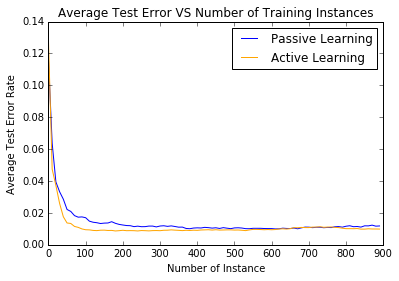

In [184]:
plt.figure()
x=[]
for i in range(0,900,10):
    x.append(i)
arr1 = np.array(avg_test_error)
arr2 = np.array(avg_test_error1)
plt.plot(x, arr1,label="Passive Learning",color="blue",linewidth=1)
plt.plot(x, arr2, label='Active Learning',color="orange",linewidth=1)
plt.ylim([0.0, 0.14])
plt.title('Average Test Error VS Number of Training Instances')
plt.xlabel('Number of Instance')
plt.ylabel('Average Test Error Rate')
plt.legend(loc="upper right")
plt.show()


## Conclusion：
### According to the graph we know that generally both error rates decrease with the incresement number of the training data. As for the passive learning and active learning, as a whole, in this case the active learning has a better performance than the passive learning because of the smaller test error. Besides both passive and active error rates become steady after about 400 instances of training data and then the 2 methods test error rates become similar.